# How to Train YOLOv9 on a Custom Dataset
---

[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

<br>

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/yolov9-benchmark.jpeg)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Tue Apr 16 19:44:05 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (325/325), 2.25 MiB | 13.79 MiB/s, done.
Resolving deltas: 100% (164/164), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.2 MB/s eta 0:00:00


**NOTE:** Let's install additional packages that will be useful later on.

In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00


## Imports

In [ ]:
import roboflow

from IPython.display import Image

## Download model weights

**NOTE:** In the YOLOv9 paper, versions yolov9-s and yolov9-m are also mentioned, but the weights for these models are not yet available in the YOLOv9 repository.

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

<font color="lightblue">

[source](https://github.com/WongKinYiu/yolov9)

##### YOLOv9-C:
 Dit model heeft een goede balans tussen nauwkeurigheid en complexiteit. Met een AP (Average Precision) van 53.0% biedt het een redelijk goede detectieprestatie. Het aantal parameters en FLOPs (Floating Point Operations) geven aan dat dit model redelijk complex is, wat betekent dat het mogelijk iets meer rekenkracht vereist in vergelijking met lichtere modellen, maar het biedt ook betere prestaties.

##### YOLOv9-E
Dit is het meest complexe en nauwkeurige model van de lijst. Met een AP van 55.6% biedt het de hoogste nauwkeurigheid, maar dit komt met een aanzienlijke toename in het aantal parameters en FLOPs. Dit model is geschikt voor situaties waar maximale nauwkeurigheid vereist is en waar voldoende rekenkracht beschikbaar is om de hogere rekeneisen te verwerken.

##### Gelan-C / Gelan-E
Hier over zijn geen statistieken van te vinden in de README. Waarschijnlijk heeft het Gelan-C model vergelijkbare prestaties als het Yolov9-C model, met wat andere parameters. Het zelfde geld voor Gelan-E

</font>

In [ ]:
!ls -la {HOME}/weights

total 402440
drwxr-xr-x 2 root root      4096 Apr 16 19:47 .
drwxr-xr-x 1 root root      4096 Apr 16 19:46 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

In [ ]:
!mkdir -p {HOME}/data

In [ ]:
SOURCE_IMAGE_PATH = "/content/Fridge_7.jpg"

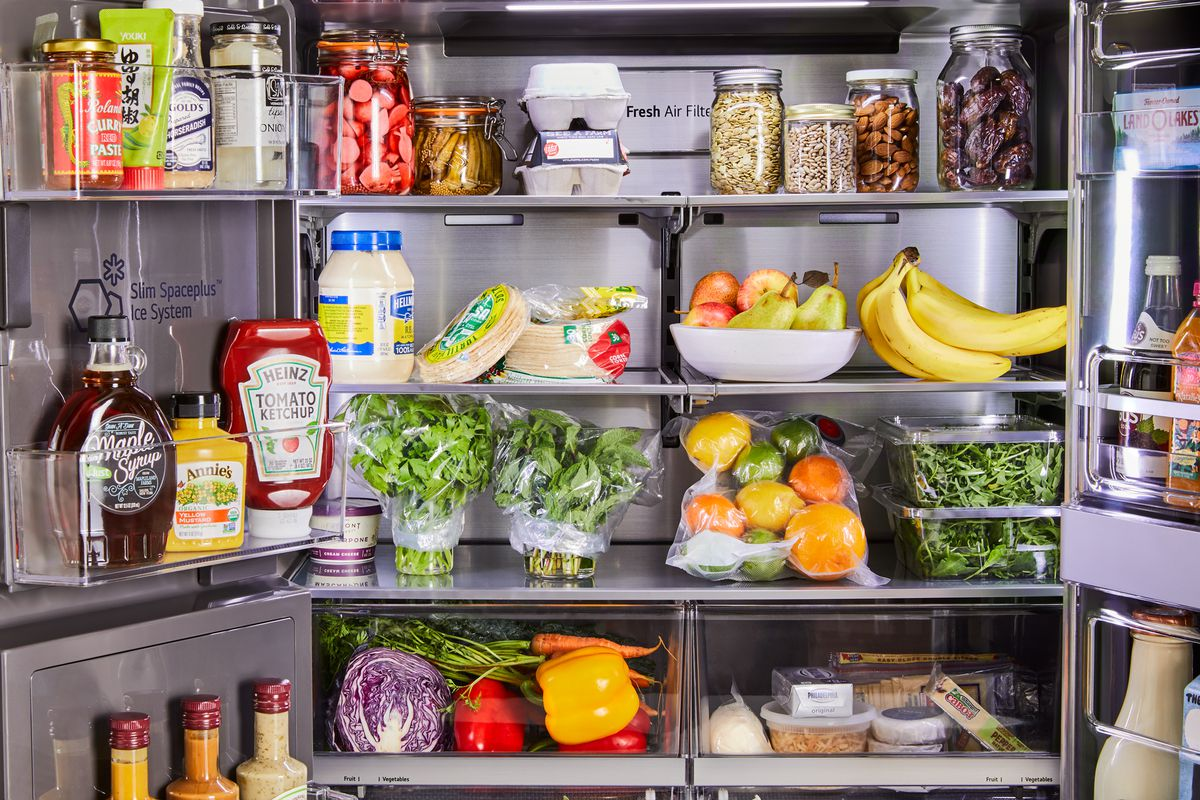

In [ ]:
Image(filename=f"{HOME}/Fridge_7.jpg", width=600)

## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source /content/Fridge_7.jpg --device 0

detect: weights=['/content/weights/gelan-c.pt'], source=/content/Fridge_7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 467 layers, 25472640 parameters, 0 gradients, 102.8 GFLOPs
image 1/1 /content/Fridge_7.jpg: 448x640 14 bottles, 1 bowl, 3 bananas, 4 apples, 5 oranges, 2 broccolis, 1 carrot, 1 refrigerator, 131.6ms
Speed: 0.5ms pre-process, 131.6ms inference, 750.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

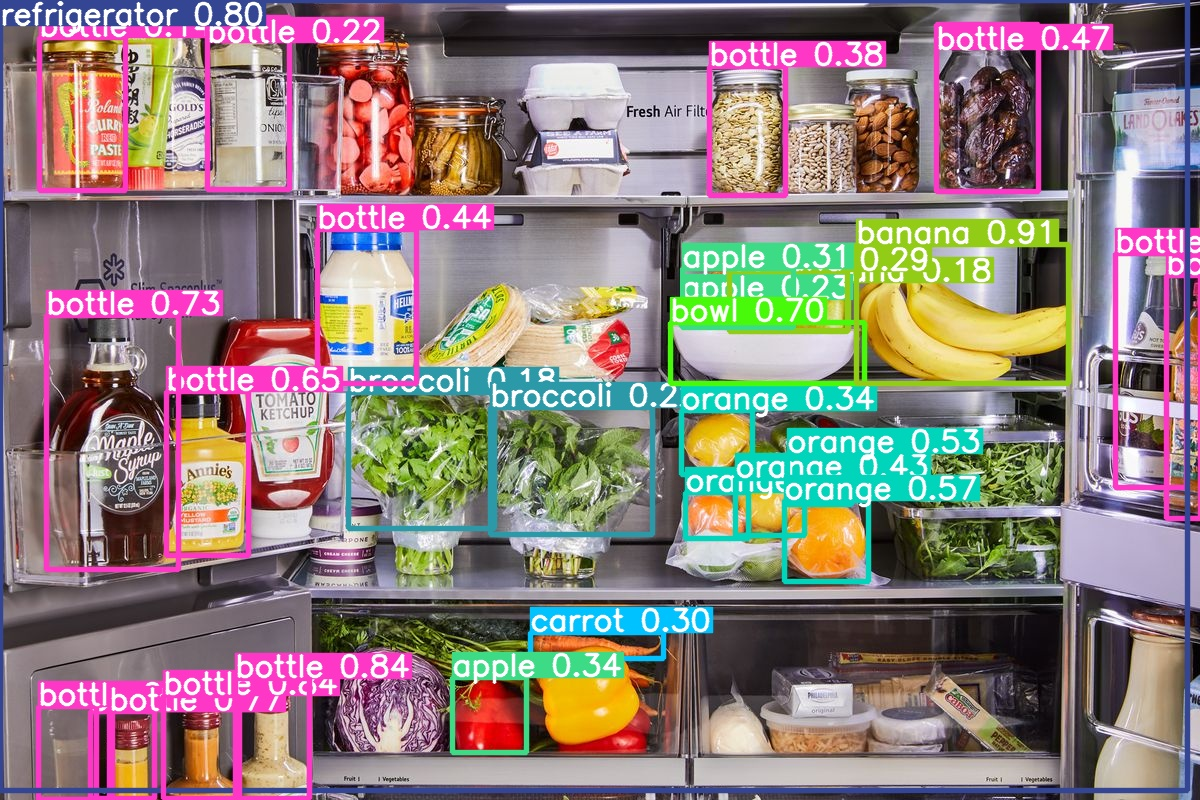

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp3/Fridge_7.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source /content/Fridge_7.jpg --device 0

detect: weights=['/content/weights/yolov9-e.pt'], source=/content/Fridge_7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 1119 layers, 69470144 parameters, 0 gradients, 244.0 GFLOPs
image 1/1 /content/Fridge_7.jpg: 448x640 19 bottles, 1 bowl, 2 bananas, 3 apples, 5 oranges, 3 broccolis, 2 carrots, 2 refrigerators, 181.6ms
Speed: 0.7ms pre-process, 181.6ms inference, 537.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


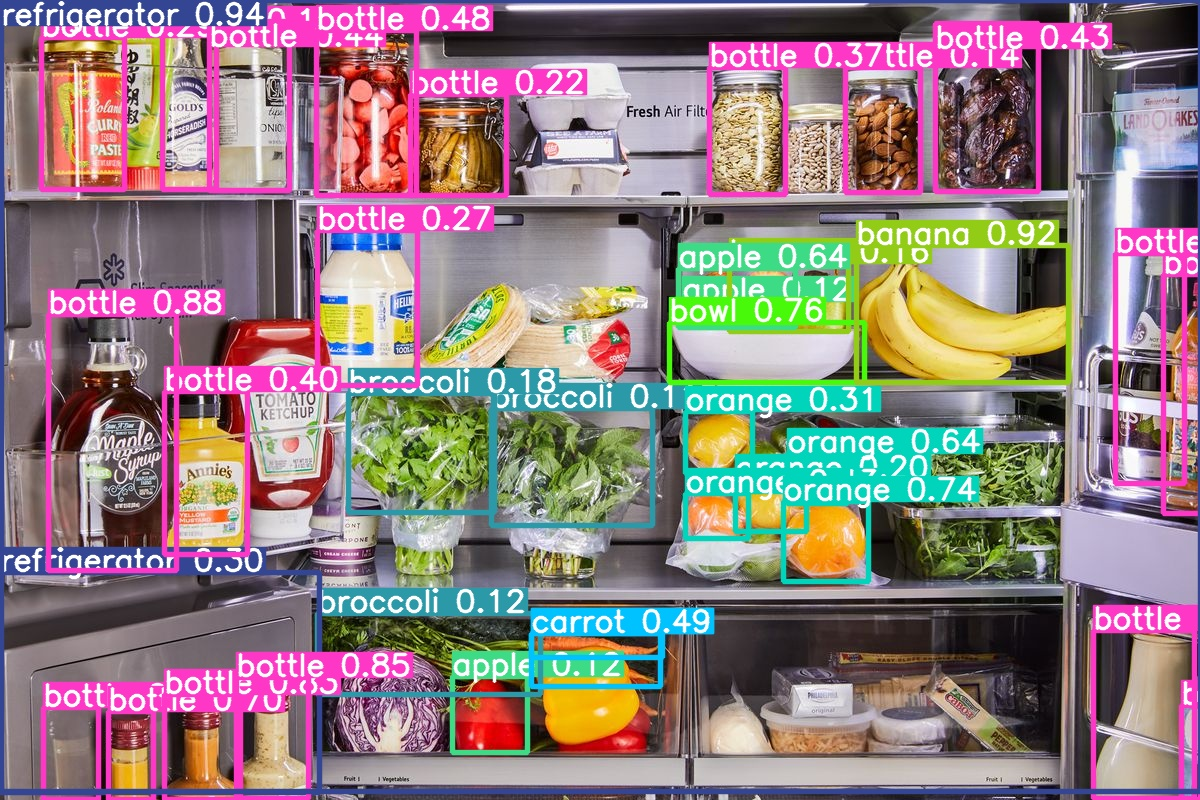

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp4/Fridge_7.jpg", width=600)

<font color="lightblue">

Als je de resultaten van YOLOv9-E en Gelan-E vergelijkt, dan merk je dat het YOLO model meestal een hogere confidence score heeft op ingredienten. Dit komt omdat dit ook het betere model is. Ook zie je dat veel complexer is dan Gelan-E. Dit heeft een voordeel in hoe goed het model identificeert, maar dat gaat tenkosten van tijd/energie. Zo'n groot model als YOLOv9-E duurt veel langer om een image te analyseren. Ook is het verschil in de confidence score redelijk laag, maar een paar procent. Persoonlijk zou ik liever het Gelan-E model gebruiken, omdat deze iets lichter is voor een prima prestatie.

</font>

## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [ ]:
%cd {HOME}/yolov9


from roboflow import Roboflow
rf = Roboflow(api_key="Owb7wL0INQDuAuAz9gth")
project = rf.workspace("nicolai-hoirup-nielsen").project("cup-detection-v2")
dataset = project.version(3).download("yolov9")



/content/yolov9
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Cup-Detection-v2-3 in yolov9:: 100%|██████████| 730/730 [00:00<00:00, 7786.94it/s]


<font color="lightblue">
Om nu mijn eigen model te maken, maak ik gebruik van Roboflow. Hier kan ik mijn eigen dataset in maken en annoteren.

Vervolgens import ik deze zelf gemaakte dataset om daar op verder te leren, Transfer Learning. Dit betekend dat ik niet van scratch ga leren, maar dat ik het Gelan model als basis heb. Dit heeft natuurlijk heel veel voordelen. Het is wel sneller met leren, door het al bestaande model. En de prestatie is ook een stuk beter, en als nog gepersonaliseerd op je eigen data set
</font>

## Train Custom Model

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="z5qWkrwiQGlRM2uLNTUp")
project = rf.workspace("swisfridge").project("food-detection-yepds")
version = project.version(2)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Detection-2 in yolov9:: 100%|██████████| 1042/1042 [00:00<00:00, 3873.80it/s]


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 10 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-04-16 20:11:51.206909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-16 20:11:51.206967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-16 20:11:51.209035: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-16 20:11:52.538751: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/Food-Detection-2/data.yaml, hyp=hyp.scratch-high.yaml, epochs=10, batch_size=8, imgsz=640, rect=False, resume=False, nosave=Fals

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
!ls {HOME}/yolov9/runs/train/exp/

confusion_matrix.png				    PR_curve.png	   val_batch0_pred.jpg
events.out.tfevents.1713297840.539695134add.6651.0  R_curve.png		   val_batch1_labels.jpg
F1_curve.png					    results.csv		   val_batch1_pred.jpg
hyp.yaml					    results.png		   val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	   val_batch2_pred.jpg
labels.jpg					    train_batch1.jpg	   weights
opt.yaml					    train_batch2.jpg
P_curve.png					    val_batch0_labels.jpg


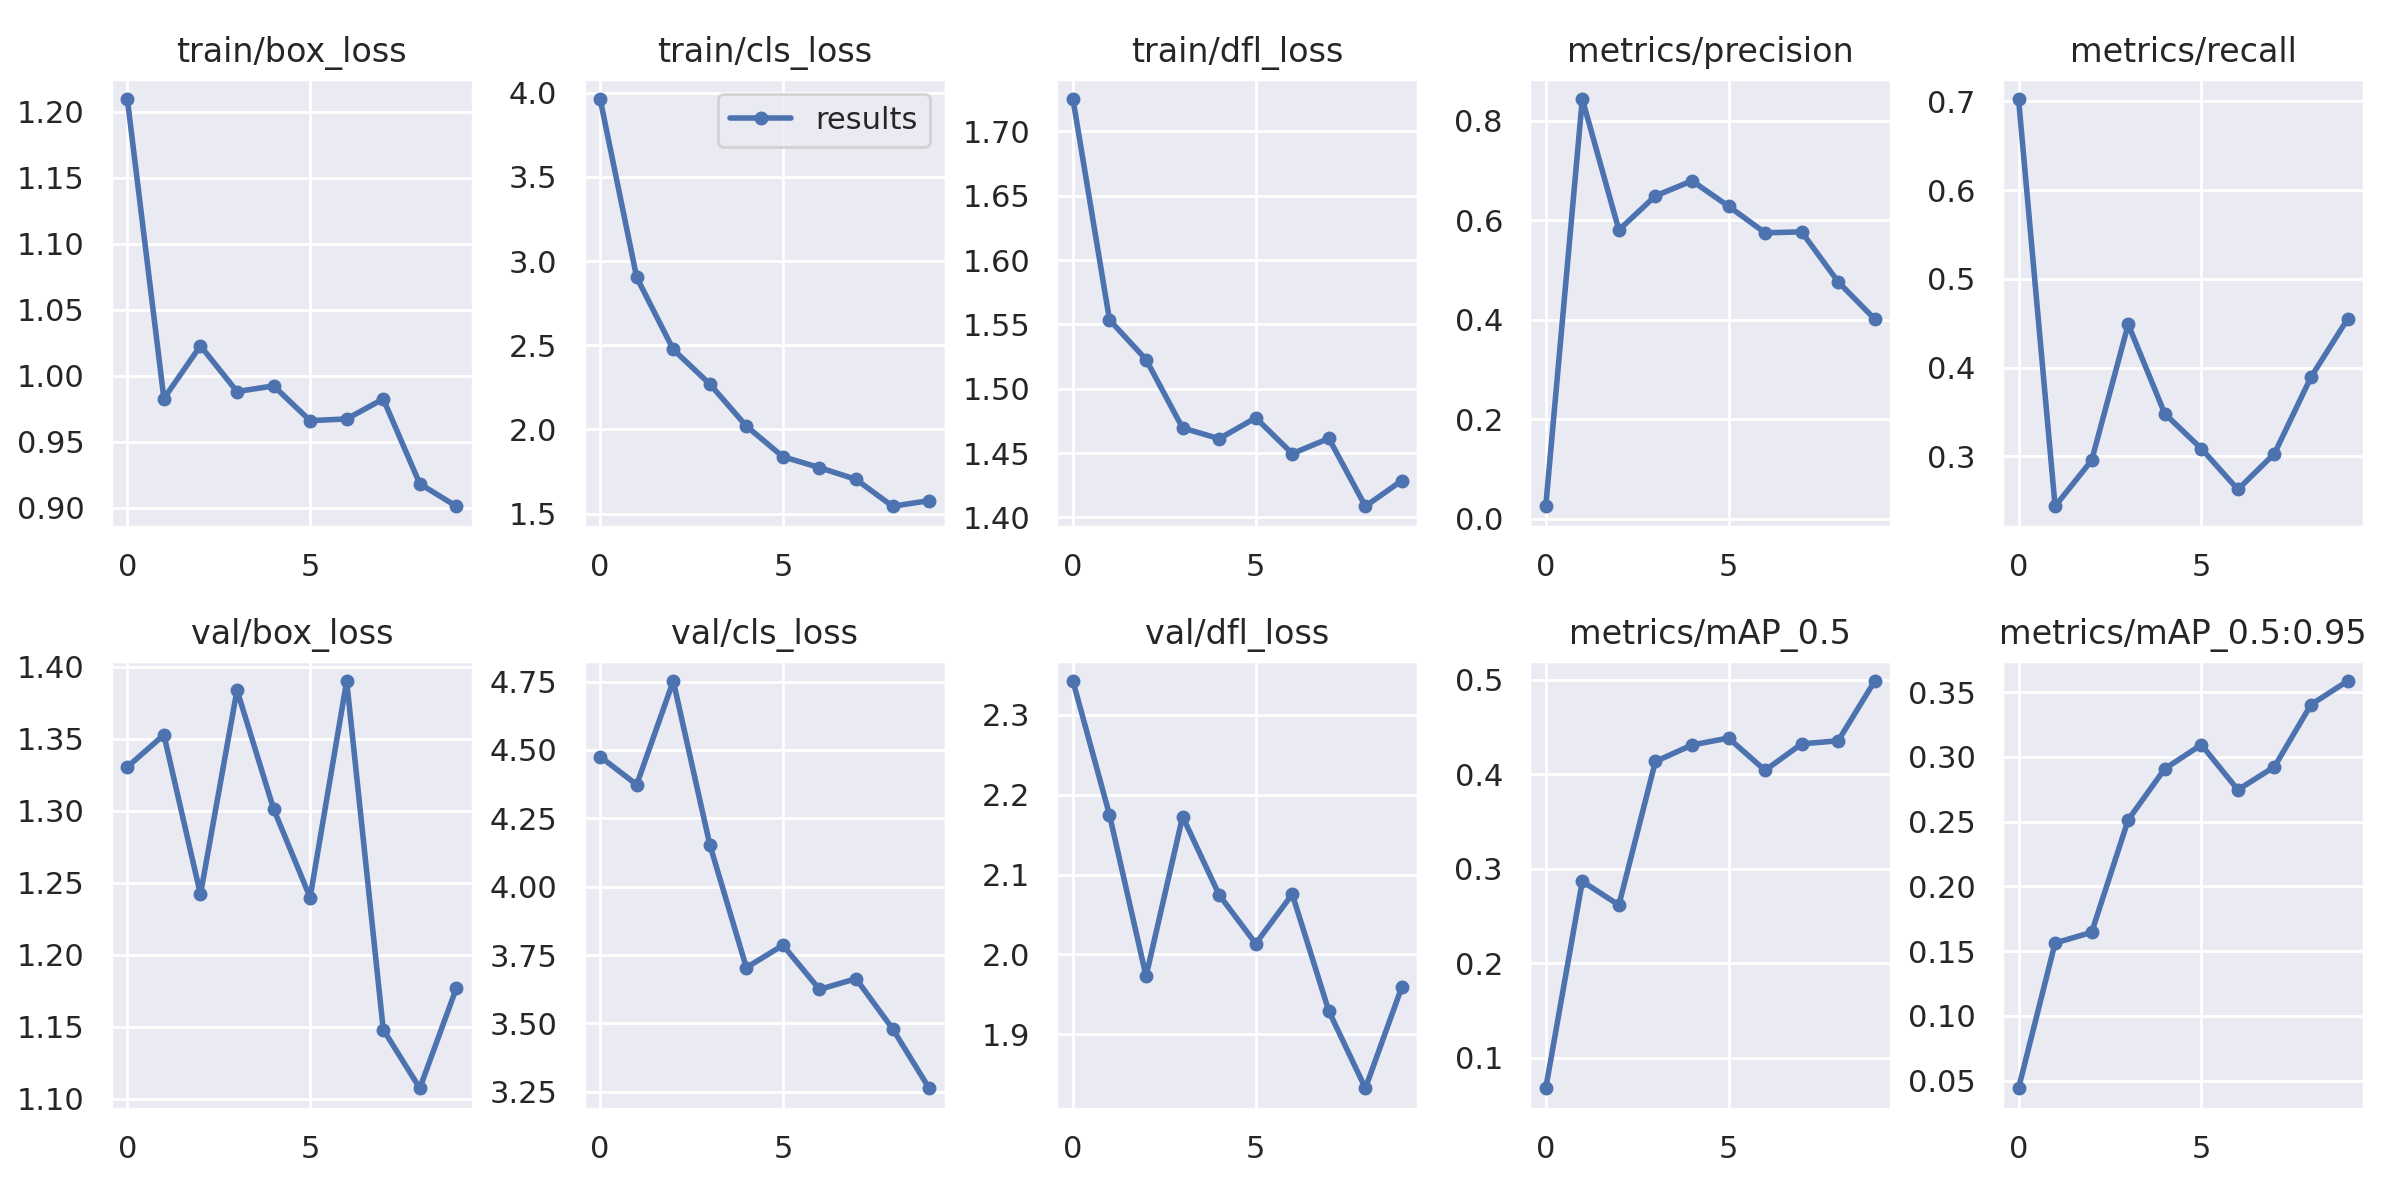

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/results.png", width=1000)

<font color="lightblue">

**Train/Box Loss:**
- De box loss tijdens de training daalt consistent en significant, wat aangeeft dat het model steeds beter wordt in het bepalen van de locaties van de objecten.Het model leert effectief om de bounding boxes nauwkeurig te plaatsen.

**Train/Cls Loss:**
- De classificatieverlies daalt gestaag, wat betekent dat het model steeds beter wordt in het correct classificeren van de objecten.Het model wordt beter in het identificeren van de juiste klassen van objecten.

#### Algemene Conclusie:

- Het model vertoont duidelijke tekenen van verbetering in zowel trainings- als validatieverliezen.
De prestaties (mAP, precisie en recall) laten zien dat het model effectief - leert, hoewel er enige fluctuaties zijn die verder kunnen worden geoptimaliseerd.
- De daling in verliezen en de stijging in mAP waarden wijzen op een succesvolle training, maar verdere training en optimalisatie kunnen de prestaties verder verbeteren.

</font>

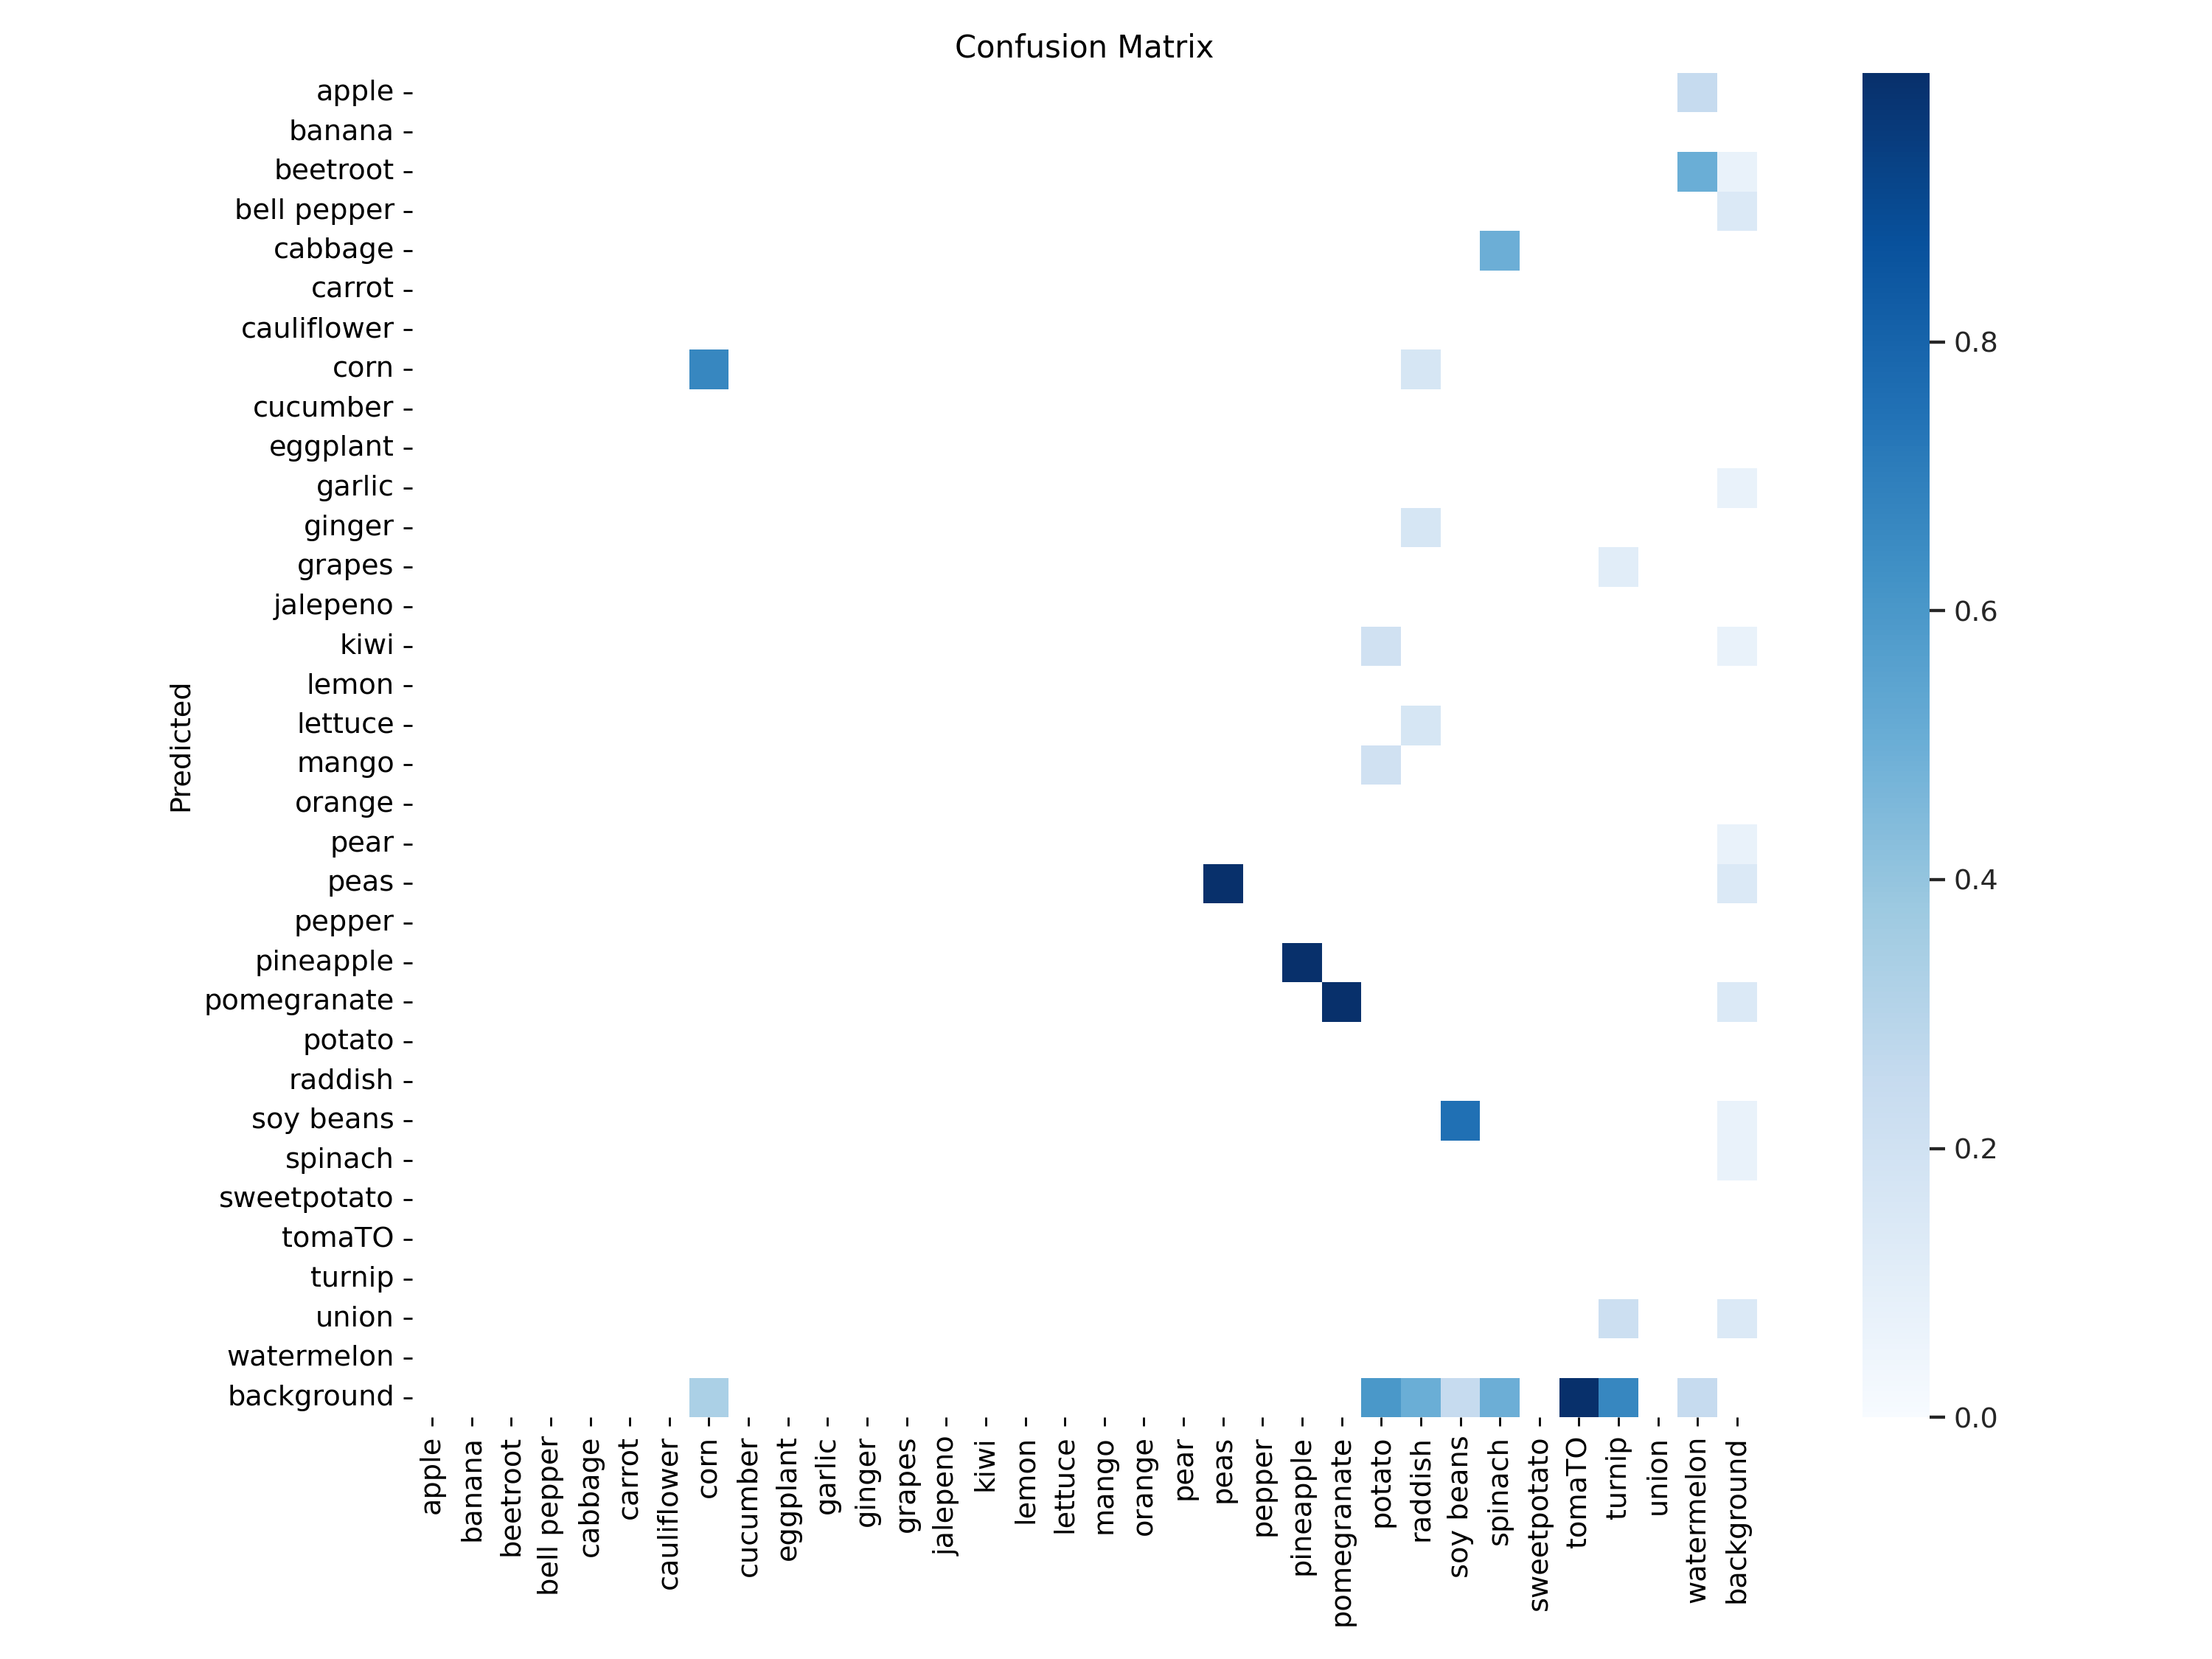

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/confusion_matrix.png", width=1000)

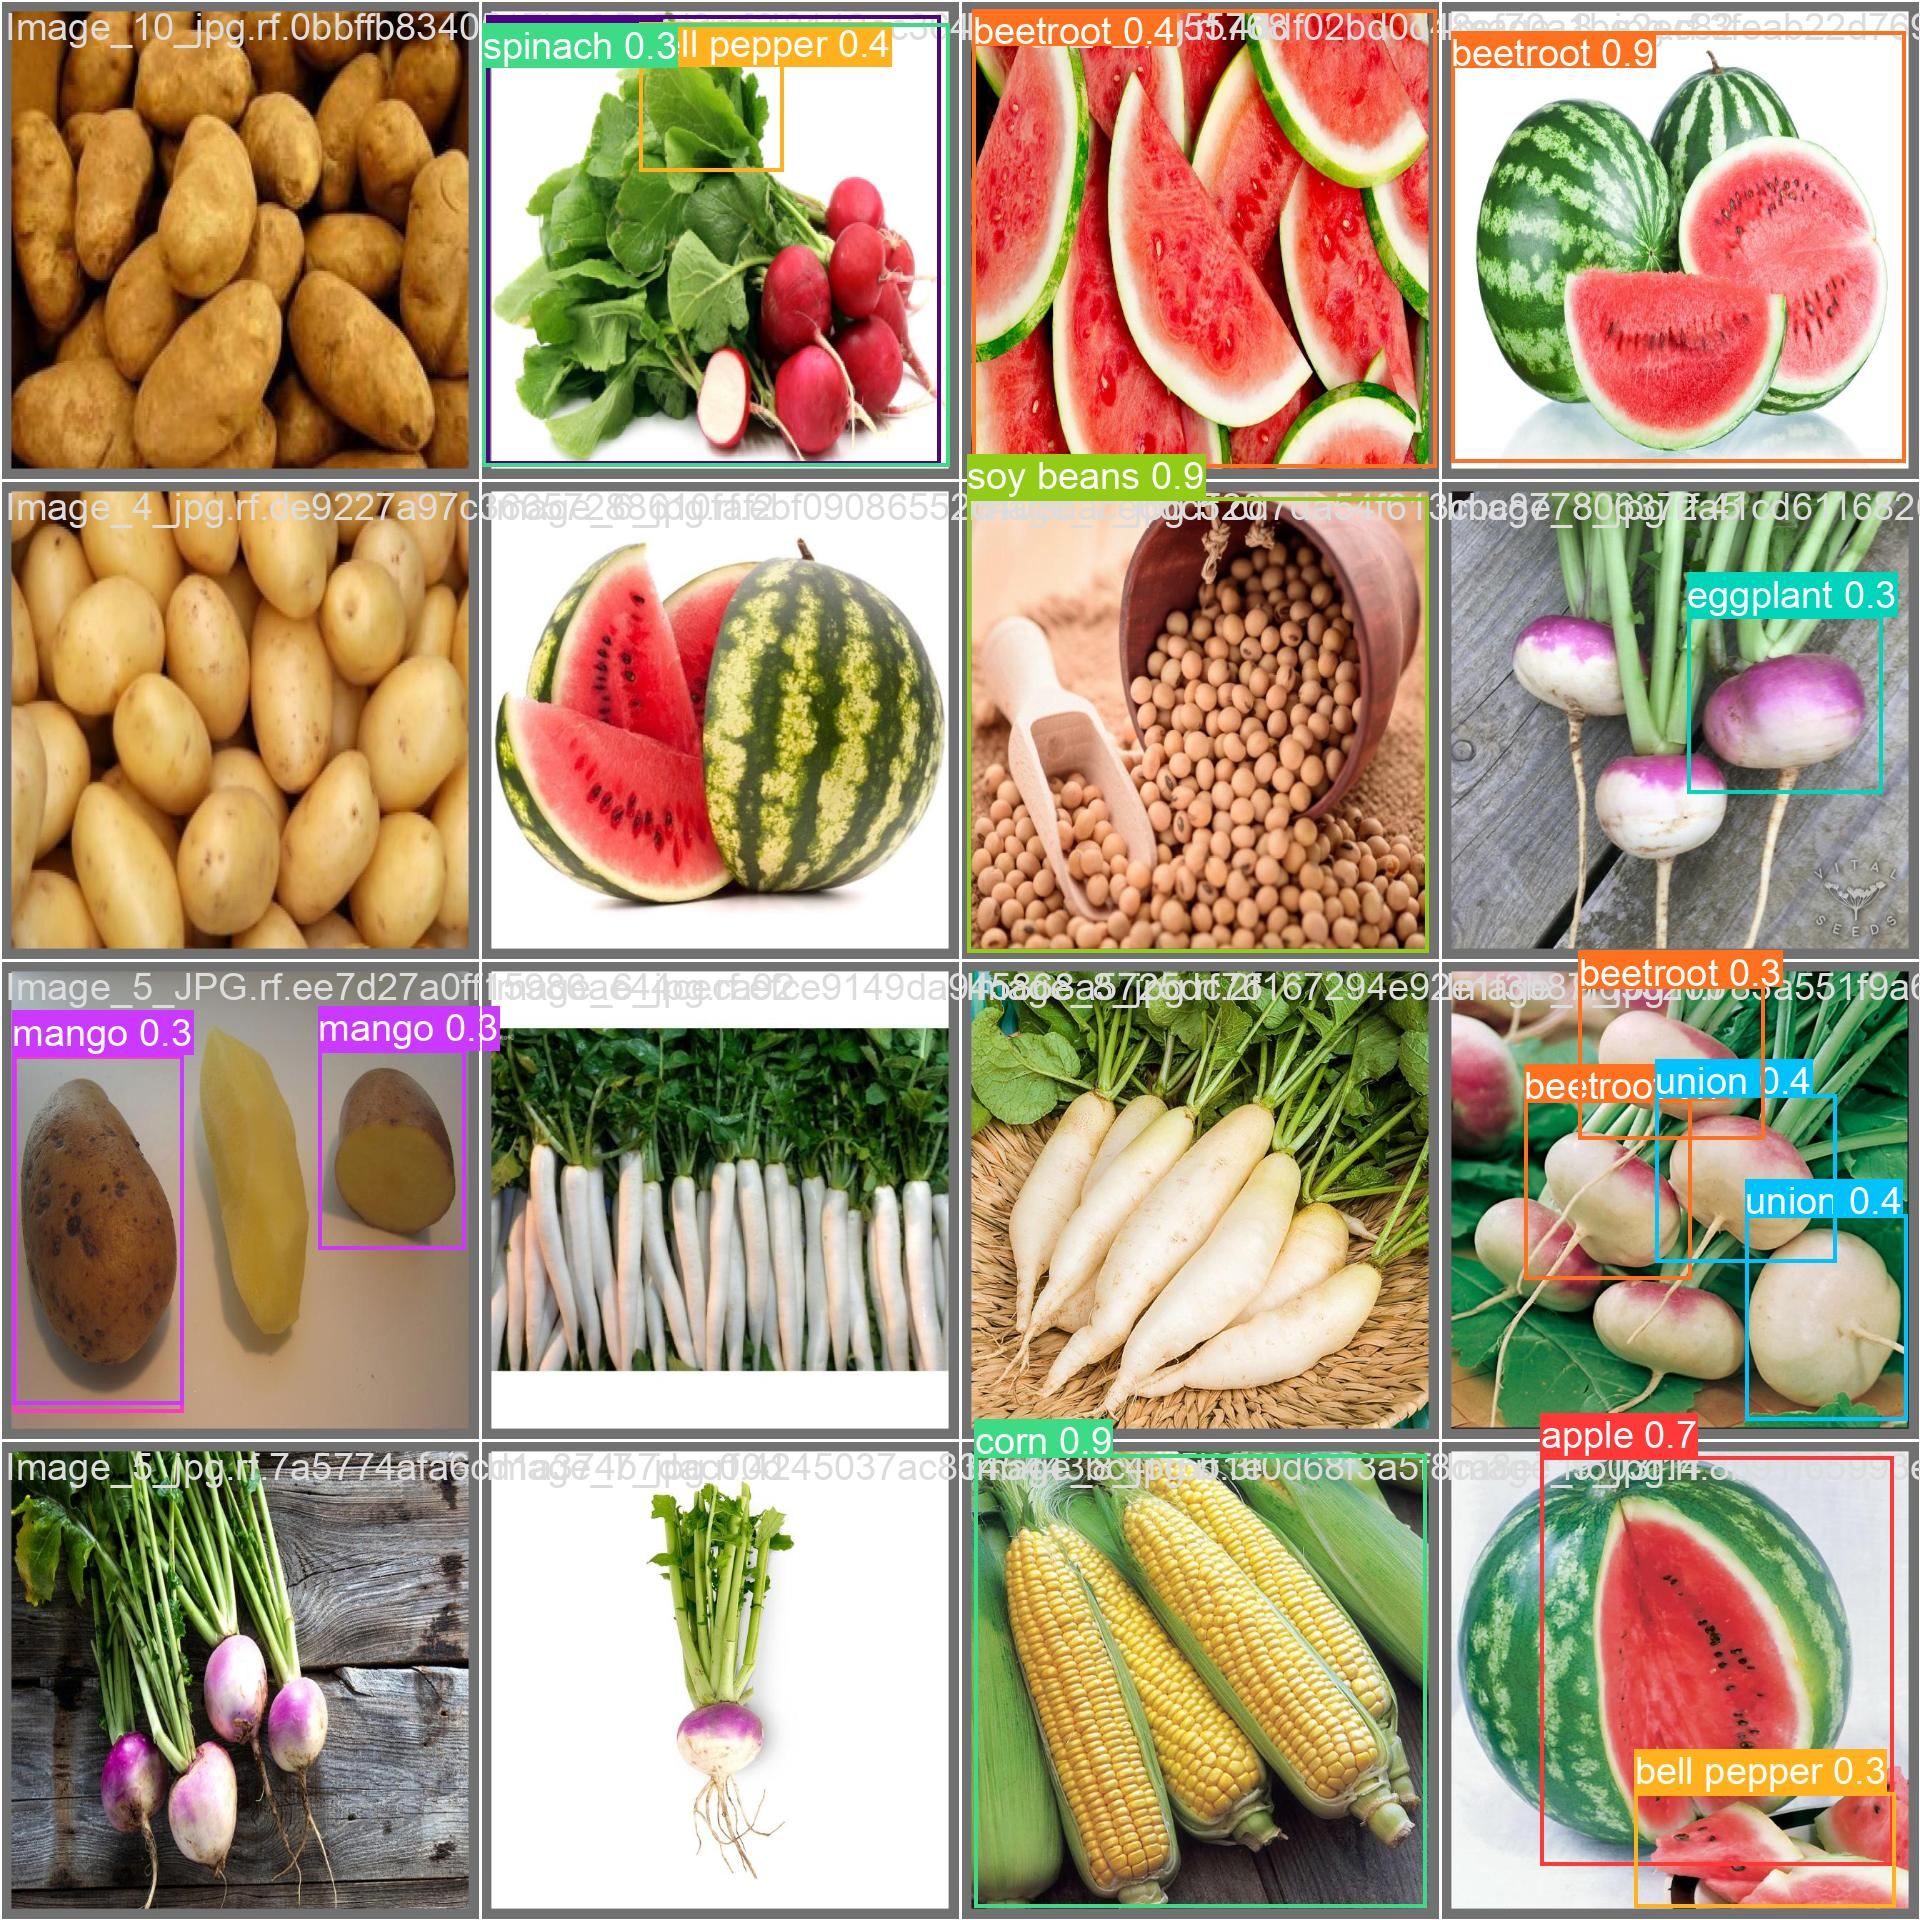

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/train/exp2/val_batch0_pred.jpg", width=1000)

## Validate Custom Model

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Food-Detection-2/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25436403 parameters, 0 gradients, 102.6 GFLOPs
val: Scanning /content/yolov9/Food-Detection-2/valid/labels.cache... 38 images, 1 backgrounds, 0 corrupt: 100% 38/38 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Image

## Inference with Custom Model

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp2/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/Food-Detection-2/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25436403 parameters, 0 gradients, 102.6 GFLOPs
image 1/38 /content/yolov9/Food-Detection-2/valid/images/Image_10_jpg.rf.0bbffb8340517b63db2d3a13a065daa5.jpg: 640x640 1 lemon, 1 soy beans, 51.9ms
image 2/38 /content/yolov9/Food-Detection-2/valid/images/Image_10_jpg.rf.8013bb077552d861821fb82aa6ae835a.jpg: 640x640 1 cabbage, 48.9ms
image 3/38 /content/yolo

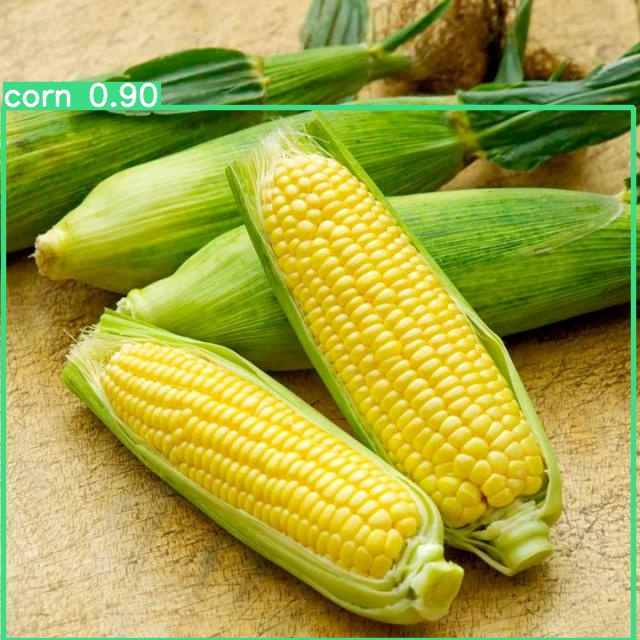

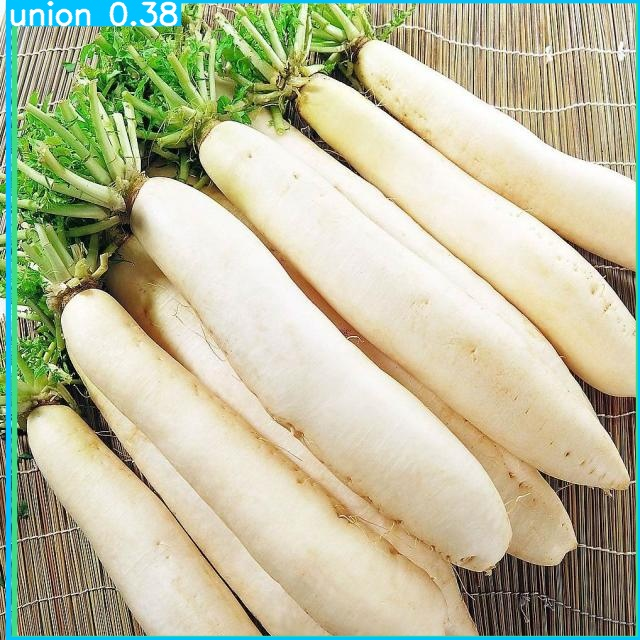

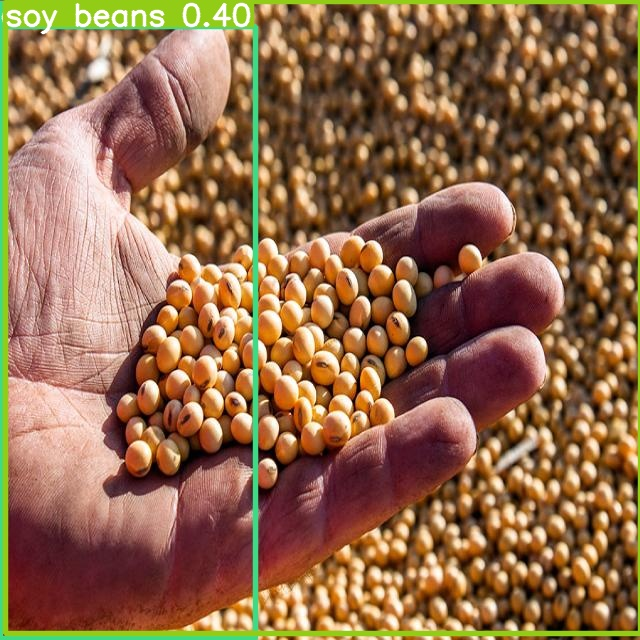

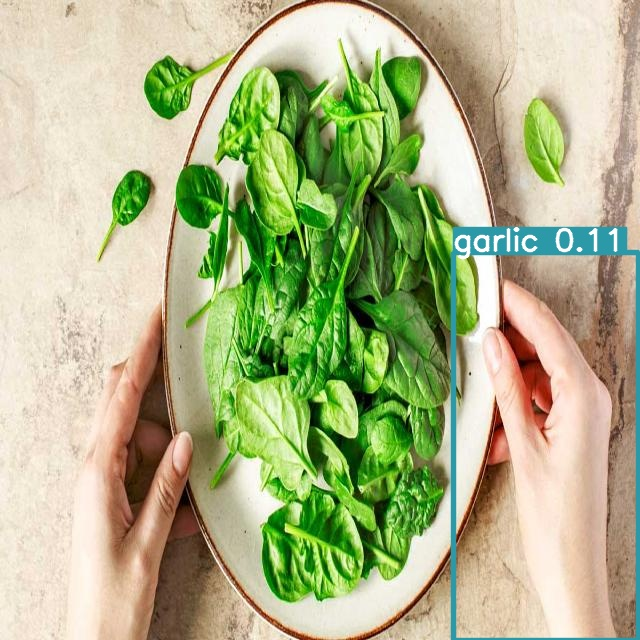

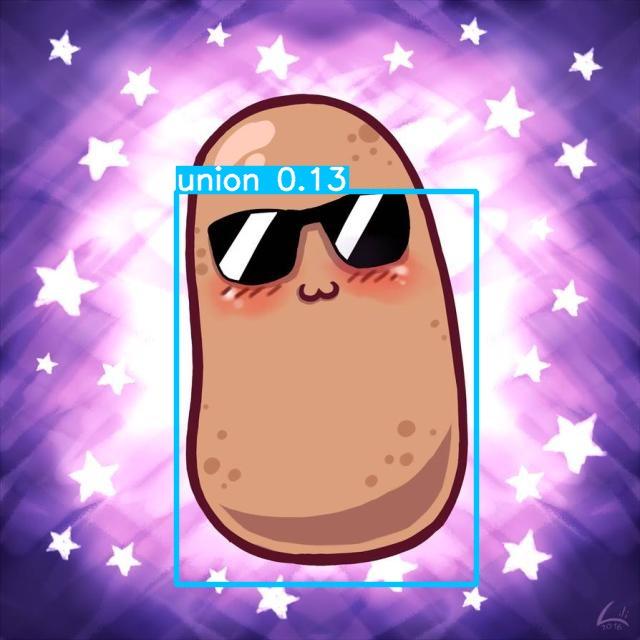

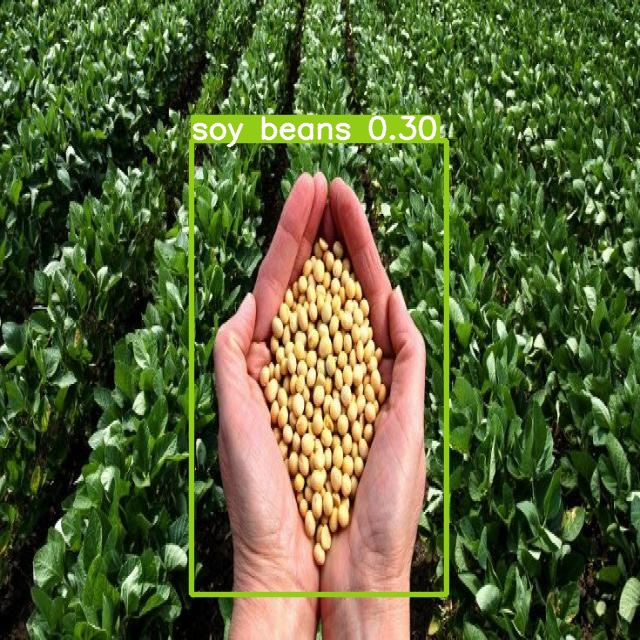

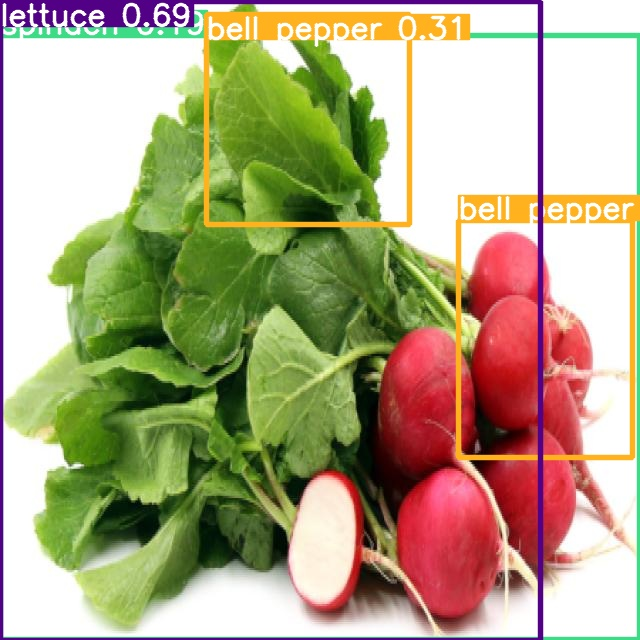

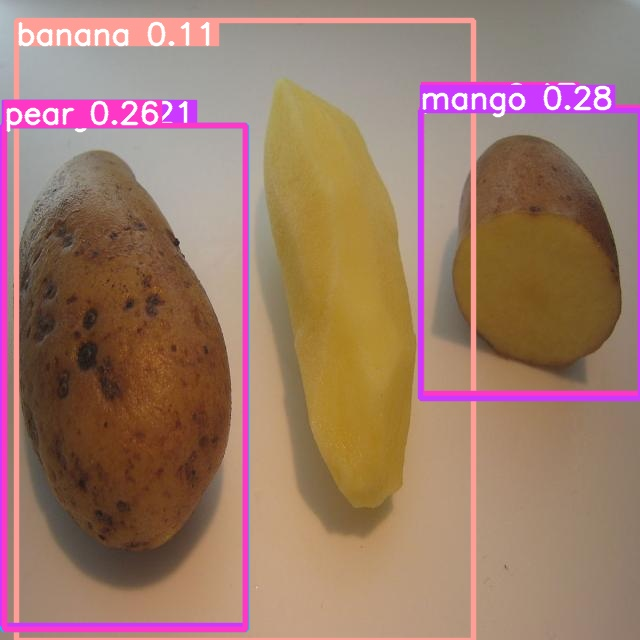

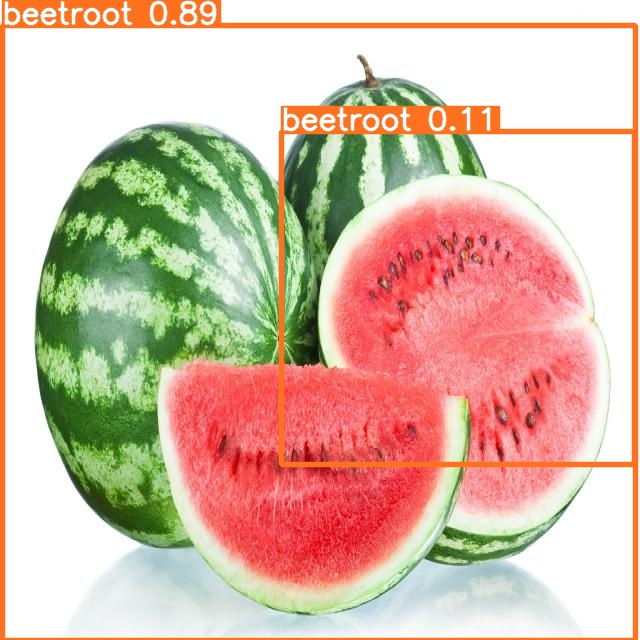

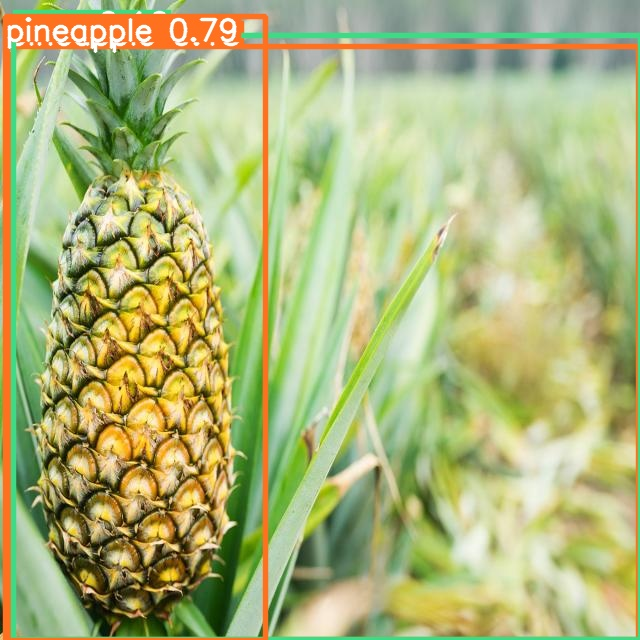

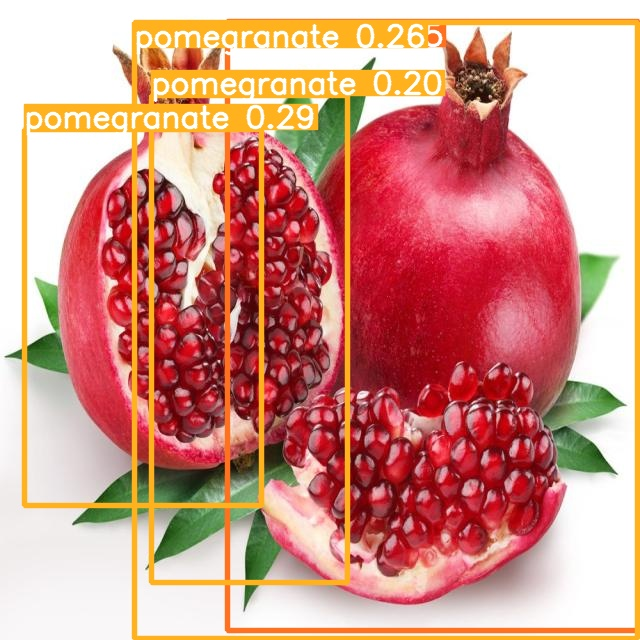

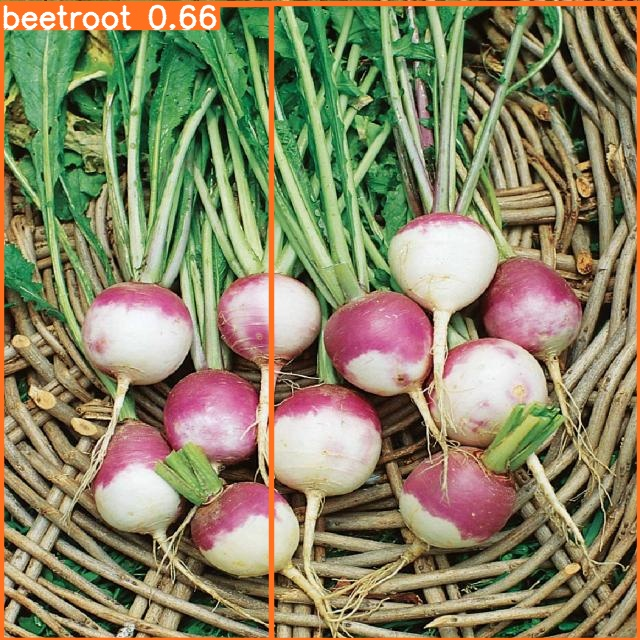

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp5/*.jpg')[:12]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [ ]:
!python detect.py --weights /content/yolov9/runs/train/exp2/weights/best.pt --conf 0.1 --source /content/Fridge_7.jpg --device 0

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/Fridge_7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25436403 parameters, 0 gradients, 102.6 GFLOPs
image 1/1 /content/Fridge_7.jpg: 448x640 1 apple, 1 banana, 1 beetroot, 1 cauliflower, 2 corns, 5 eggplants, 1 garlic, 1 grapes, 2 lemons, 2 peppers, 2 pineapples, 132.6ms
Speed: 0.6ms pre-process, 132.6ms inference, 666.5ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp6


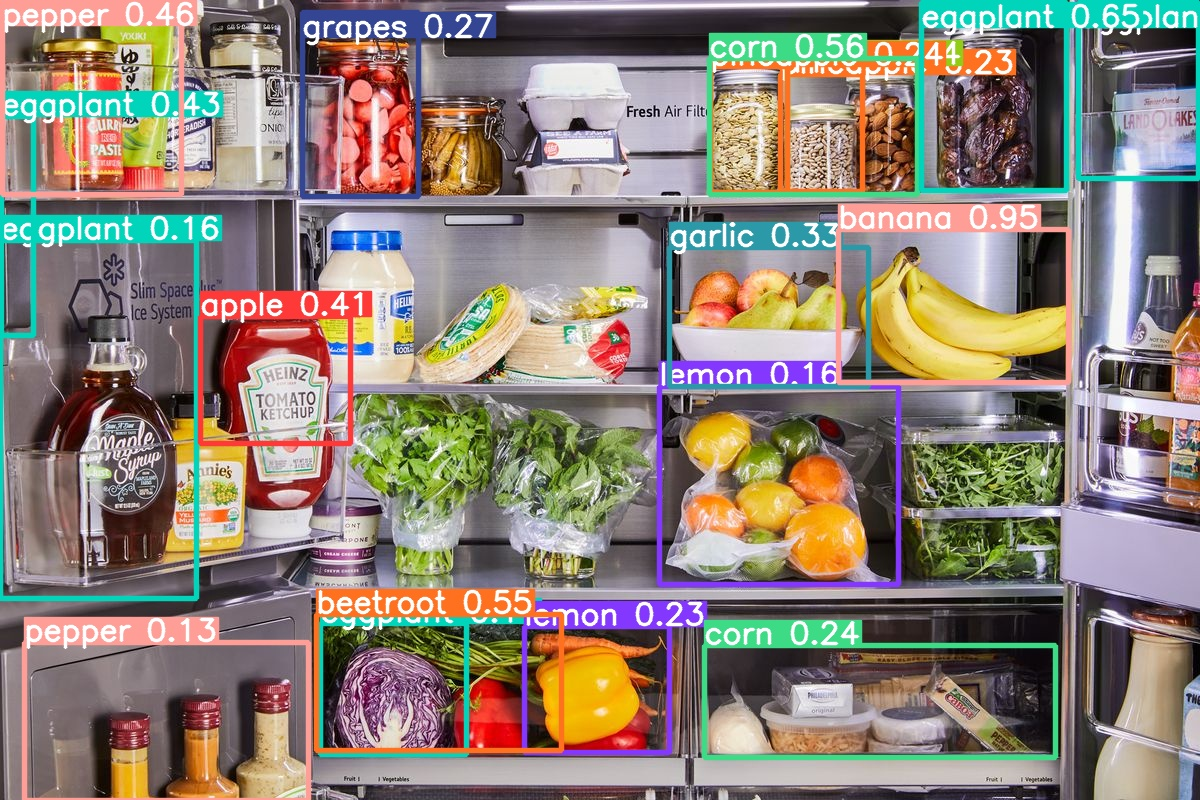

In [ ]:
Image(filename=f"{HOME}/yolov9/runs/detect/exp6/Fridge_7.jpg", width=1000)

<font color="lightblue">
### Analyse van de Beelden:
#### Output van mijn bijgetrainde model:

**Objecten herkend:**
- pepper, eggplant, grapes, apple, garlic, banana, lemon, corn, beets
**Observaties:**
- Het model heeft verschillende objecten herkend, maar de scores voor sommige objecten zijn relatief laag (bijvoorbeeld pepper 0.13, eggplant 0.16).
- Sommige objecten worden meerdere keren gedetecteerd met verschillende scores (bijvoorbeeld eggplant).
- De variëteit van herkende objecten is behoorlijk breed, maar sommige objecten zoals bottles en broccoli worden niet herkend.

#### Output van YOLOv9:

**Objecten herkend:**
- refrigerator, bottle, apple, broccoli, banana, bowl, orange, carrot
**Observaties:**
- Het model herkent een breed scala aan objecten met relatief hoge scores.
- Meer objecten worden gedetecteerd, waaronder verschillende items zoals bottles, broccoli, en bowl, die niet door jouw bijgetrainde model zijn herkend.
- De scores zijn over het algemeen hoger en consistenter, wat duidt op een meer betrouwbare detectie.

### Vergelijking en Conclusie:

#### Detectiecapaciteit:
- YOLOv9 herkent meer objecten en heeft hogere detectiescores. Dit suggereert dat het model beter is in het identificeren van een breed scala aan objecten met hogere betrouwbaarheid.
- Bijgetraind model: Hoewel het model verschillende objecten herkent, mist het een aantal objecten die YOLOv9 wel herkent, zoals bottles en broccoli. De scores zijn ook lager en minder consistent.

#### Nauwkeurigheid:
- YOLOv9: De hogere en consistenter scores duiden op een betere nauwkeurigheid en betrouwbaarheid.
- Bijgetraind model: De lagere scores en de afwezigheid van sommige objecten wijzen op een minder nauwkeurige detectie.

#### Algemene prestaties:
- YOLOv9 lijkt beter te presteren in termen van zowel het aantal gedetecteerde objecten als de nauwkeurigheid van de detectie.
- Bijgetraind model: Hoewel het in staat is om verschillende objecten te detecteren, zijn de prestaties minder betrouwbaar en missen sommige objecten.

### Aanbevelingen:

**Verbetering van het bijgetrainde model:**
- Data-augmentatie: Pas data-augmentatie toe om het model te helpen generaliseren naar verschillende objecten en scenario's.
- Meer training: Verleng de trainingstijd of gebruik een grotere en meer diverse dataset om de prestaties te verbeteren.
- Hyperparameter tuning: Pas de hyperparameters aan om de training te optimaliseren.
- Gebruik van pre-trained modellen: Start de training met een beter pre-trained model dat al goede prestaties levert.
</font>